In [1]:
#Sensitivity vs Specificity Graph
import nbimporter
%run ~\MSAnalysis\ms_functions.ipynb

from pathlib import Path
home = str(Path.home())+'/MSAnalysis/'

Note that if running these programs in a different file, the paths will need to be changed.

In [2]:
def ROC_plot(msdata, neg_col, technical_replicates, rep_name, as_fraction=True):    
    samples = by_sample(msdata, technical_replicates)
    neg_cont = msdata.iloc[:,neg_col]
    neg_cont = np.array(neg_cont)

    sample = np.array(samples[rep_name].values.flatten())

    all_data = np.concatenate((neg_cont, sample))
    all_data = np.unique(all_data)
    all_data.sort()
    all_data = all_data[::-1]
    
    points = {}
    total = len(all_data)
    for t in all_data:
        x = len([i for i in neg_cont if i > t])
        if as_fraction: x=x / len((neg_cont))
        y = len([i for i in sample if i > t])
        if as_fraction: y=y / len(skipZero(sample))
        points[y] = x
            
    return points

In [3]:
def ROC_all(data, neg_col, cols=list(range(0,10)), boost=None, as_fraction=True):
    plt.xlabel("Control Proteins")
    plt.ylabel("Sample Proteins")
    if boost!=None:
        p = ROC_plot(data, neg_col, {'a':[boost]}, 'a', as_fraction=as_fraction)
        plt.plot(p.values(), p.keys())
    for i in cols:
        if i != neg_col and i != boost:
            p = ROC_plot(data, neg_col, {'a':[i]}, 'a', as_fraction=as_fraction)
            plt.plot(p.values(), p.keys())

In [4]:
file = "{0}data/proteinGroups_MS3_simplified.txt".format(home)
data = readin(file)

file = "{0}data/proteinGroups_SCoPE2_simplified.txt".format(home)
Slavov2_data = readin(file)

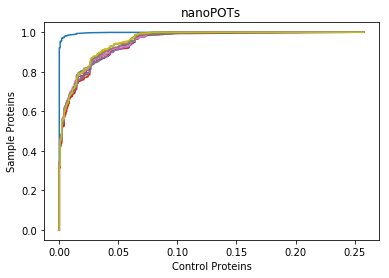

In [5]:
plt.title('nanoPOTs')
ROC_all(data, 7, boost=9)
plt.show()

In [6]:
technical_replicates = {"Line 1":[3]}#,5,6,7,8,9]}
Slavov2 = ROC_plot(Slavov2_data, 4, technical_replicates, "Line 1")

In [7]:
technical_replicates = {"Line 1":[0]}#,1,2,3,4,5,6,8]}
Kelly = ROC_plot(data, 7, technical_replicates, "Line 1")

In [8]:
file = "{0}data/proteinGroups_nanoWELLS_run3_simplified.txt".format(home)
data0_3 = readin(file)
p3 = ROC_plot(data0_3, 9, {"Line 1":[0]}, "Line 1")

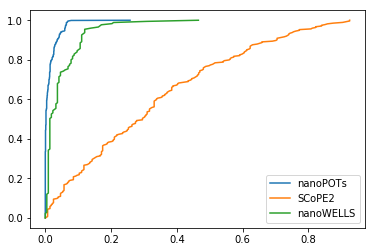

In [9]:
plt.plot(Kelly.values(), Kelly.keys(), label="nanoPOTs")
plt.plot(Slavov2.values(), Slavov2.keys(), label="SCoPE2")
plt.plot(p3.values(), p3.keys(), label="nanoWELLS")
plt.legend(loc='lower right')
plt.show()